# **Analysis of Hospital Data: Final Report**

### **Project goal**

This project focuses on examining hospital admission data to identify trends across patient profiles, billing information, and medical outcomes, aiming to generate insights that contribute to more effective healthcare decision-making.

### Key findings

1) Age and Medical Condition Correlation: Older patients were more frequently associated with chronic medical conditions, while younger patients had a higher rate of short-term or mild diagnoses.

2) Gender Distribution in Admissions: The dataset showed a relatively balanced gender ratio, with minor variations in the types of medical conditions or medications prescribed between males and females.

3) Billing and Admission Type Relationship: Emergency admissions generally resulted in higher billing amounts compared to routine or scheduled admissions, reflecting the increased resources and urgency of care required.

4) Insurance Provider Impact: Patients with active insurance coverage had a smoother billing process and lower out-of-pocket costs, indicating a clear link between insurance type and financial outcomes in hospital management.

### **Data Source**: https://www.kaggle.com/datasets/prasad22/healthcare-dataset

In [40]:
# Setup and Imports
# Import the pandas library, which is essential for data manipulation and analysis.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Load the dataset into a pandas DataFrame
# Make sure the .csv file is in the same directory as this notebook
df = pd.read_csv('Data.csv')

# Convert date columns from 'object' to 'datetime'
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Remove records with an invalid billing amount (billing amount < 0)
df = df[df['Billing Amount'] >= 0]

# --- Handle Duplicates ---
# Check for and remove any duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
# -----------------------------

print("\nData cleaning complete. Columns renamed, data types corrected, and invalid rows removed.")

# Display the first 5 rows to get a feel for the data
print("--- First 5 Rows of the Dataset ---")
df.head()


Number of duplicate rows found: 532
Duplicate rows removed.

Data cleaning complete. Columns renamed, data types corrected, and invalid rows removed.
--- First 5 Rows of the Dataset ---


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### The Overall Picture: Attendance & Patient Demographics

We start by looking at the dataset's high-level characteristics. First, what is the overall test result? Second, who are the patients?

C:\Users\edwar\AppData\Local\Temp\ipykernel_18652\1662736851.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Test Results', data=df, palette=["#5c6db8", '#d9534f', "#4fd95a" ])


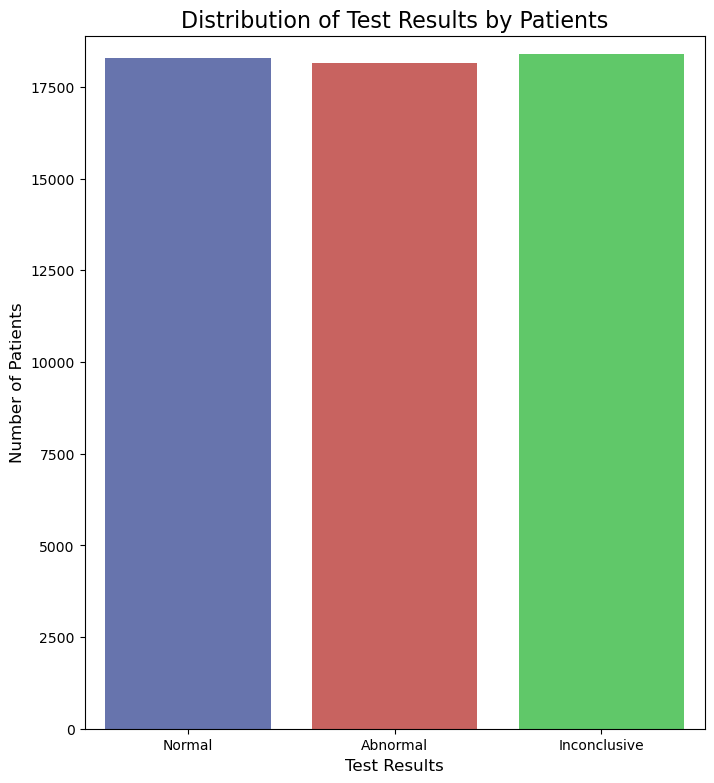

In [42]:
# --- Chart 1: No-Show Distribution ---

# Set the figure size for better readability
plt.figure(figsize=(8, 9))

# Create the count plot using seaborn
sns.countplot(x='Test Results', data=df, palette=["#5c6db8", '#d9534f', "#4fd95a" ])

# Add a clear title and labels
plt.title('Distribution of Test Results by Patients', fontsize=16)
plt.xlabel('Test Results', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks([0, 1, 2], ['Normal', 'Abnormal', 'Inconclusive']) # Make x-axis labels more descriptive
plt.ylim(0, 18900)

# Display the plot
plt.show()

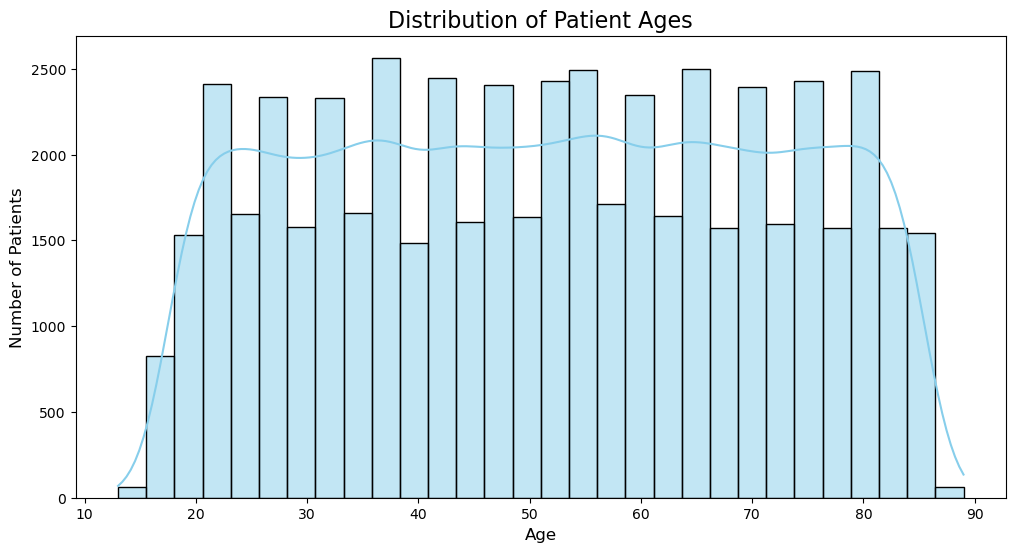

In [43]:
# --- Chart 2: Patient Age Distribution ---

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the histogram using seaborn
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')

# Add a title and labels
plt.title('Distribution of Patient Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Display the plot
plt.show()

### Deeper Analysis: Key Factors in Cancer rate

Now we'll investigate how different factors correlate with the cancer rate.

C:\Users\edwar\AppData\Local\Temp\ipykernel_18652\2538132945.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cancer_rate = df.groupby('AgeGroup')['Medical_Condition_numeric'].mean() * 100
C:\Users\edwar\AppData\Local\Temp\ipykernel_18652\2538132945.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_cancer_rate.index, y=age_cancer_rate.values, palette='viridis')


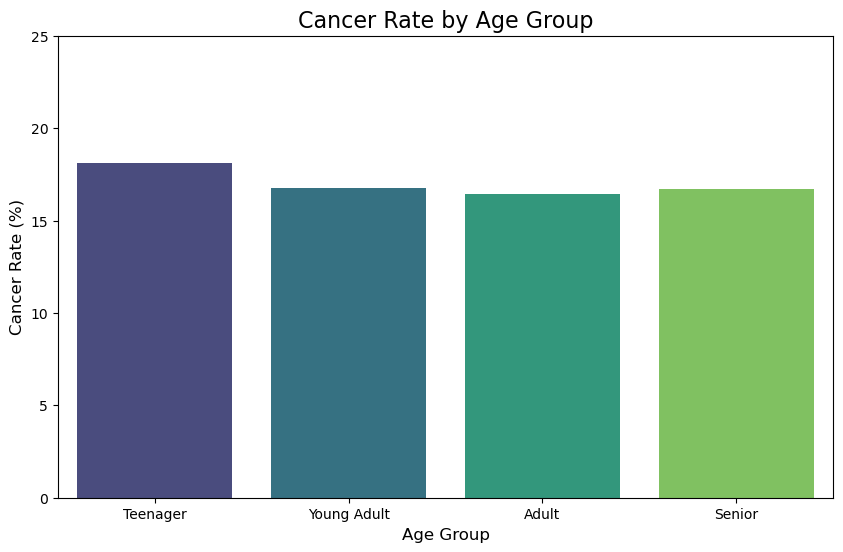

In [44]:
# --- Analysis: Cancert Rate by Age Group ---

# Step 1: Create age groups using pd.cut()
# Define the edges of our age bins
age_bins = [13, 18, 35, 60, 120]
# Define the labels for these bins
age_labels = ['Teenager', 'Young Adult', 'Adult', 'Senior']

# Create the new 'AgeGroup' column
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Step 2: Calculate the cancer rate for each age group
# We need to convert 'Medical Concdition' to a numerical format (1/0) to calculate the mean
df['Medical_Condition_numeric'] = df['Medical Condition'].apply(lambda x: 1 if x == 'Cancer' else 0)

# Group by the new 'AgeGroup' and calculate the mean (which is now the cancer rate)
age_cancer_rate = df.groupby('AgeGroup')['Medical_Condition_numeric'].mean() * 100

# Step 3: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=age_cancer_rate.index, y=age_cancer_rate.values, palette='viridis')

# Customize the plot
plt.title('Cancer Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Cancer Rate (%)', fontsize=12)
plt.ylim(0, 25) # Set y-axis limit to better see the differences

# Display the plot
plt.show()

### **Interpretation: Age Group**

The chart shows that cancer rates are relatively consistent across all age groups, with teenagers having the highest rate at around 18%, followed by young adults, adults, and seniors at about 16–17%. This suggests that cancer risk is not limited to older age groups and may be influenced by other factors beyond age.

C:\Users\edwar\AppData\Local\Temp\ipykernel_18652\2381299294.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Blood_Type_Cancer_rate.index, y=Blood_Type_Cancer_rate.values, palette='coolwarm')


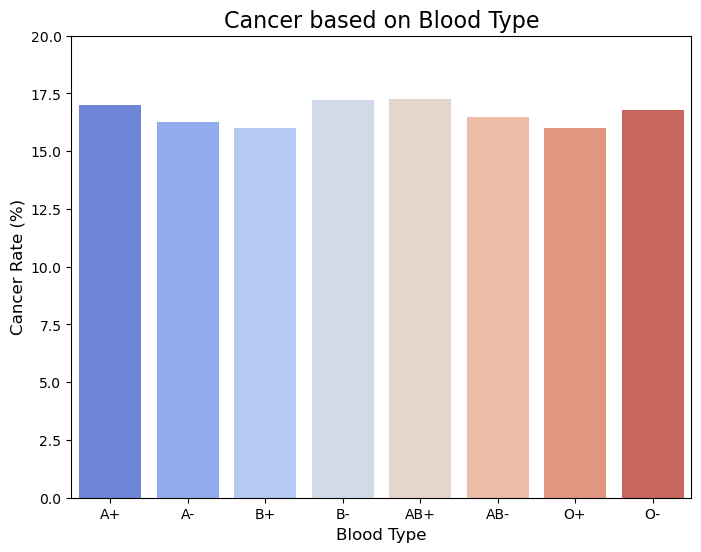

Blood Type
A+     16.993749
A-     16.259808
AB+    15.992433
AB-    17.232833
B+     17.248400
B-     16.469902
O+     16.016367
O-     16.794343
Name: Medical_Condition_numeric, dtype: float64


In [45]:
# --- Analysis: Cancer Rate by Blood Type ---

# Group by the 'Blood Type' column and calculate the mean cancer rate
Blood_Type_Cancer_rate = df.groupby('Blood Type')['Medical_Condition_numeric'].mean() * 100

# Visualize the results
plt.figure(figsize=(8, 6))
sns.barplot(x=Blood_Type_Cancer_rate.index, y=Blood_Type_Cancer_rate.values, palette='coolwarm')

# Customize the plot
plt.title('Cancer based on Blood Type', fontsize=16)
plt.ylabel('Cancer Rate (%)', fontsize=12)
plt.xlabel('Blood Type', fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']) # Make x-axis labels descriptive
plt.ylim(0, 20)

# Display the plot
plt.show()

# Print the exact rates for clarity
print(Blood_Type_Cancer_rate)

### **Interpretation: Blood Type**

The data indicates that cancer rates remain fairly balanced across all blood types, with only slight variations. Individuals with blood types B−, AB+, and O− show slightly higher rates, while B+ and O+ have the lowest. This suggests that blood type has minimal impact on cancer prevalence within the dataset.
